In [1]:
library(googlesheets4)
library(ggplot2)
library(ggbeeswarm)
library(glue)

Warning message:
"package 'ggbeeswarm' was built under R version 4.0.5"


In [2]:
library(googlesheets4)
sheets_auth(path = "I:/spreadsheet-service-302407.json")

all_data <- read_sheet(
    ss="12yARRjZTZlD-tqx-bz7JYzwZ5XVVOf59o8kTbR0s4xw",
    range="shCtrl_003_shOPA1_003(論文用データ)"
)

Warning message:
"`sheets_auth()` is deprecated as of googlesheets4 0.2.0.
Please use `gs4_auth()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."
Reading from "quantification_result"

Range "'shCtrl_003_shOPA1_003(論文用データ)'"

New names:
* `` -> ...5
* `` -> ...23
* `` -> ...28
* `` -> ...37
* `` -> ...40
* ...



Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_tex

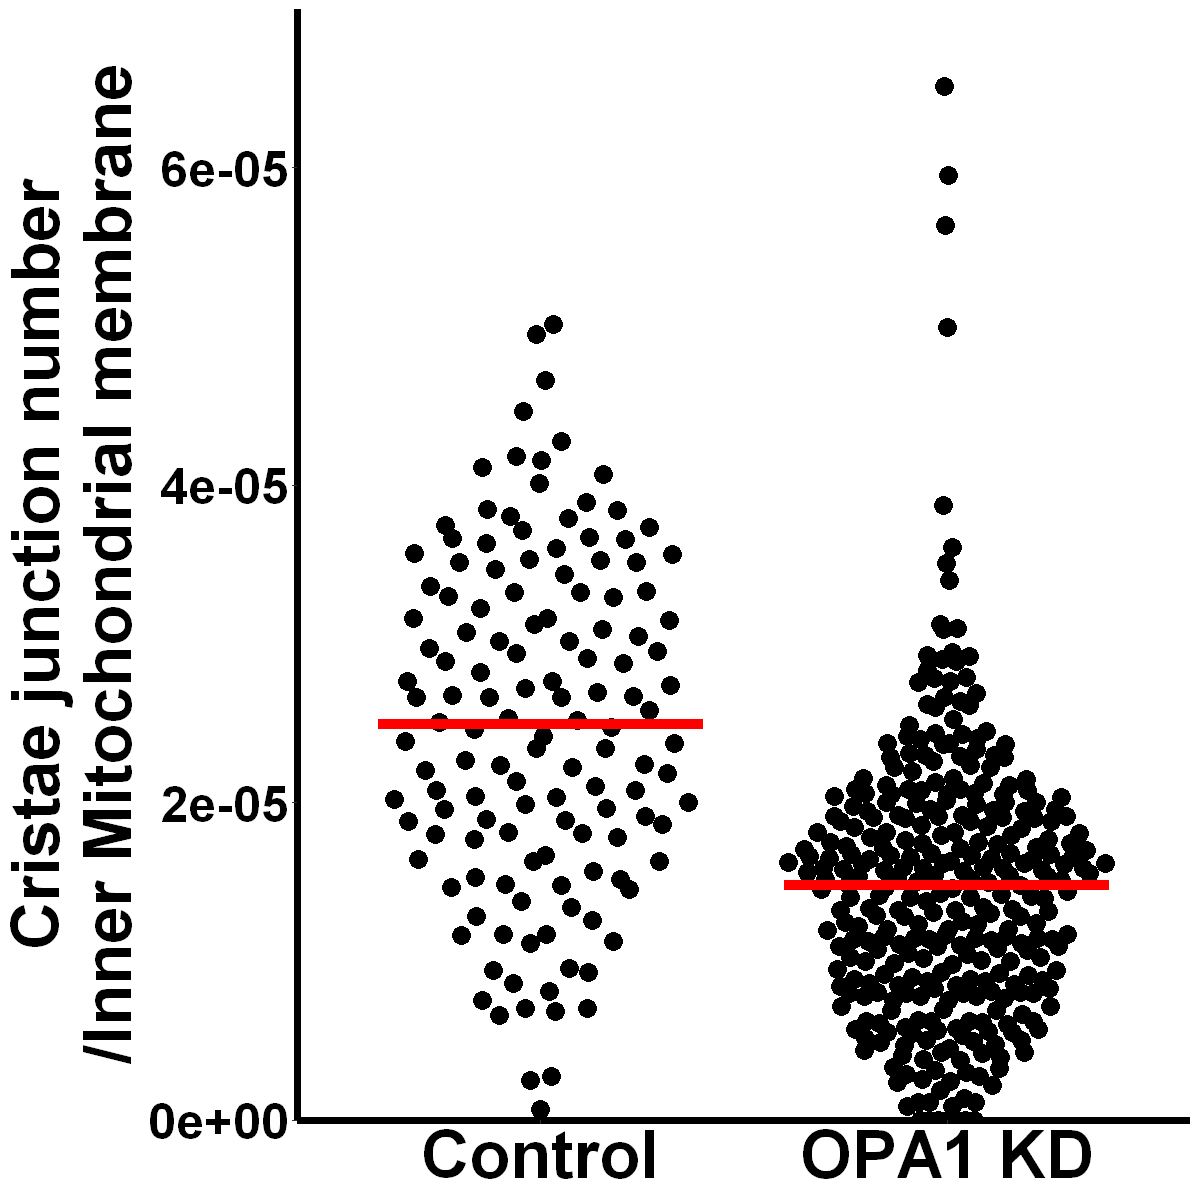

In [3]:
options(repr.plot.width=10, repr.plot.height=10)

graph <- ggplot(NULL)

graph <- graph + theme(
    axis.line = element_line(size = 2, colour="black"),
    axis.title.x = element_blank(),
    axis.title.y = element_text(size = 40, face = "bold", family = "Helvetica", color="black"),
    axis.text.x = element_text(size = 40, face = "bold", family = "Helvetica", color="black"),
    axis.text.y = element_text(size = 30, face = "bold", family = "Helvetica", color="black"),
    panel.background = element_blank(), 
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
) + scale_y_continuous(
    expand = c(0,0), 
    limits=c(0, 0.00007)
)

graph <- graph + labs(
    y = "Cristae junction number\n/Inner Mitochondrial membrane"
) + geom_quasirandom(
    data = all_data,
    aes(Gene, `re_extract_CJ_number_no_1px_2px/IMM_50m`),
    size =5 ,
    position=position_jitter(width = 0.3, height = 0)
) 


graph <- graph + annotate(
    "segment",
    x = 0.6, xend = 1.4,
    y = mean(all_data[all_data$Gene == "shCtrl", ]$`re_extract_CJ_number_no_1px_2px/IMM_50m`), 
    yend = mean(all_data[all_data$Gene == "shCtrl", ]$`re_extract_CJ_number_no_1px_2px/IMM_50m`),
    size = 3,
    color="red"
)+ annotate(
    "segment",
    x = 1.6, xend = 2.4,
    y = mean(all_data[all_data$Gene == "shOPA1", ]$`re_extract_CJ_number_no_1px_2px/IMM_50m`), 
    yend = mean(all_data[all_data$Gene == "shOPA1", ]$`re_extract_CJ_number_no_1px_2px/IMM_50m`),
    size = 3,
    color="red"
)  + scale_x_discrete(
    labels = c("Control", "OPA1 KD"),
)

graph

In [4]:
wilcox.test(
    all_data[all_data$Gene == "shCtrl", ]$`re_extract_CJ_number_no_1px_2px/IMM_50m`, 
    all_data[all_data$Gene == "shOPA1", ]$`re_extract_CJ_number_no_1px_2px/IMM_50m`
)


	Wilcoxon rank sum test with continuity correction

data:  all_data[all_data$Gene == "shCtrl", ]$`re_extract_CJ_number_no_1px_2px/IMM_50m` and all_data[all_data$Gene == "shOPA1", ]$`re_extract_CJ_number_no_1px_2px/IMM_50m`
W = 34002, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [5]:
dir.create("Z:/paper_data/2021_cristae/for_revision_#2/fig7F")
ggsave(file = "Z:/paper_data/2021_cristae/for_revision_#2/fig7F/cj_number.svg", plot = graph, dpi = 100, width = 10, height = 10)


Warning message in dir.create("Z:/paper_data/2021_cristae/for_revision_#2/fig7F"):
" 'Z:\paper_data\2021_cristae\for_revision_#2\fig7F' はすでに存在します "
